In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

change_to_disk()
data_dir = Path("clean_split_1k/")
models_path = Path('Models/')
saves = Path('Trainning_results_saves/')

In [2]:
image_shape = (1920, 1080)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[1]), int(resize[0])]

data_transform = create_transform(resize=resize, rotate=180, color_dev=True, transf_tensor=True, normalize=True, sp_noise=True, gauss_noise=True)

BATCH_SIZE = 16
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [3]:
NUM_EPOCHS = 100
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetSmall()
mobnet_lrg = MobileNetLarge()
effnetb0 = EfficientNetB0()
effnetb5 = EfficientNetB5()

loss_fn = nn.CrossEntropyLoss()

In [6]:
model_name = "ResNet18_Noise"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train ResNet18
resnet18.to(device)
nadam_optim = torch.optim.NAdam(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

Models\ResNet18_Noise does not exist, creating one...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9259 | train_acc: 0.5717 | validation_loss: 0.7686 | validation_acc: 0.6328
Epoch: 2 | train_loss: 0.7602 | train_acc: 0.6490 | validation_loss: 1.0845 | validation_acc: 0.4961
Epoch: 3 | train_loss: 0.7268 | train_acc: 0.6558 | validation_loss: 0.9474 | validation_acc: 0.5176
Epoch: 4 | train_loss: 0.6762 | train_acc: 0.6895 | validation_loss: 0.7647 | validation_acc: 0.6426
Epoch: 5 | train_loss: 0.6267 | train_acc: 0.7125 | validation_loss: 0.6482 | validation_acc: 0.7012
Epoch: 6 | train_loss: 0.5987 | train_acc: 0.7250 | validation_loss: 0.7688 | validation_acc: 0.6367
Epoch: 7 | train_loss: 0.5951 | train_acc: 0.7262 | validation_loss: 0.6666 | validation_acc: 0.6660
Epoch: 8 | train_loss: 0.5722 | train_acc: 0.7385 | validation_loss: 0.8243 | validation_acc: 0.6289
Epoch: 9 | train_loss: 0.5599 | train_acc: 0.7398 | validation_loss: 0.5331 | validation_acc: 0.7695
Epoch: 10 | train_loss: 0.5546 | train_acc: 0.7535 | validation_loss: 0.5261 | validation_a

In [7]:
eval_resnet18_results = eval_model(resnet18, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(16, 3, resize[0], resize[1]).to(device))
resnet18_results = [train_resnet18_results, train_time_resnet18, eval_resnet18_results]
final_save(model_folder_path,model_name, NUM_EPOCHS, resnet18, resnet18_results)

  0%|          | 0/32 [00:01<?, ?it/s]

In [8]:
model_name = "MobileNetSmall_Noise"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train MobileNetV3 Small
mobnet_sml.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_sml.parameters(), lr=lr)
train_mobnet_sml_results, train_time_mobnet_sml = train(mobnet_sml, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

Models\MobileNetSmall_Noise does not exist, creating one...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1934 | train_acc: 0.4335 | validation_loss: 0.8072 | validation_acc: 0.6270
Epoch: 2 | train_loss: 0.8742 | train_acc: 0.5797 | validation_loss: 0.8941 | validation_acc: 0.5234
Epoch: 3 | train_loss: 0.7783 | train_acc: 0.6392 | validation_loss: 0.9569 | validation_acc: 0.5254
Epoch: 4 | train_loss: 0.7156 | train_acc: 0.6587 | validation_loss: 0.6754 | validation_acc: 0.6348
Epoch: 5 | train_loss: 0.6659 | train_acc: 0.6865 | validation_loss: 0.7214 | validation_acc: 0.6777
Epoch: 6 | train_loss: 0.6052 | train_acc: 0.7130 | validation_loss: 0.8207 | validation_acc: 0.5508
Epoch: 7 | train_loss: 0.5930 | train_acc: 0.7258 | validation_loss: 0.7476 | validation_acc: 0.6309
Epoch: 8 | train_loss: 0.5460 | train_acc: 0.7420 | validation_loss: 0.6273 | validation_acc: 0.7324
Epoch: 9 | train_loss: 0.5387 | train_acc: 0.7472 | validation_loss: 0.6069 | validation_acc: 0.7617
Epoch: 10 | train_loss: 0.5038 | train_acc: 0.7615 | validation_loss: 0.7165 | validation_a

In [9]:
eval_mobnet_sml_results = eval_model(mobnet_sml, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(16, 3, resize[0], resize[1]).to(device))
mobnet_sml_results = [train_mobnet_sml_results, train_time_mobnet_sml, eval_mobnet_sml_results]
final_save(model_folder_path,model_name, NUM_EPOCHS, mobnet_sml, mobnet_sml_results)

  0%|          | 0/32 [00:01<?, ?it/s]

In [10]:
model_name = "MobileNetLarge_Noise"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train MobileNetV3 Large
mobnet_lrg.to(device)
nadam_optim = torch.optim.NAdam(params=mobnet_lrg.parameters(), lr=lr)
train_mobnet_lrg_results, train_time_mobnet_lrg = train(mobnet_lrg, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

Models\MobileNetLarge_Noise does not exist, creating one...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1879 | train_acc: 0.4412 | validation_loss: 0.8951 | validation_acc: 0.5742
Epoch: 2 | train_loss: 0.8549 | train_acc: 0.5958 | validation_loss: 0.8082 | validation_acc: 0.6055
Epoch: 3 | train_loss: 0.7608 | train_acc: 0.6400 | validation_loss: 0.6166 | validation_acc: 0.7402
Epoch: 4 | train_loss: 0.7562 | train_acc: 0.6335 | validation_loss: 0.7050 | validation_acc: 0.6055
Epoch: 5 | train_loss: 0.6909 | train_acc: 0.6755 | validation_loss: 0.8770 | validation_acc: 0.6230
Epoch: 6 | train_loss: 0.6909 | train_acc: 0.6810 | validation_loss: 0.6454 | validation_acc: 0.6758
Epoch: 7 | train_loss: 0.6430 | train_acc: 0.6885 | validation_loss: 0.6136 | validation_acc: 0.7461
Epoch: 8 | train_loss: 0.6170 | train_acc: 0.7000 | validation_loss: 0.7568 | validation_acc: 0.6504
Epoch: 9 | train_loss: 0.6027 | train_acc: 0.7043 | validation_loss: 0.6974 | validation_acc: 0.6758
Epoch: 10 | train_loss: 0.5766 | train_acc: 0.7085 | validation_loss: 0.5636 | validation_a

In [11]:
eval_mobnet_lrg_results = eval_model(mobnet_lrg, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(16, 3, resize[0], resize[1]).to(device))
mobnet_lrg_results = [train_mobnet_lrg_results, train_time_mobnet_lrg, eval_mobnet_lrg_results]
final_save(model_folder_path, model_name, NUM_EPOCHS, mobnet_lrg, mobnet_lrg_results)

  0%|          | 0/32 [00:02<?, ?it/s]

In [12]:
model_name = "EfficientNetB0_Noise"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train EfficientNet B0
effnetb0.to(device)
nadam_optim = torch.optim.NAdam(params=effnetb0.parameters(), lr=lr)
train_effnetb0_results, train_time_effnetb0 = train(effnetb0, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

Models\EfficientNetB0_Noise does not exist, creating one...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4119 | train_acc: 0.3312 | validation_loss: 1.0795 | validation_acc: 0.4277
Epoch: 2 | train_loss: 0.9068 | train_acc: 0.5625 | validation_loss: 0.7349 | validation_acc: 0.5977
Epoch: 3 | train_loss: 0.7735 | train_acc: 0.6132 | validation_loss: 0.6633 | validation_acc: 0.7031
Epoch: 4 | train_loss: 0.7310 | train_acc: 0.6492 | validation_loss: 0.6159 | validation_acc: 0.7207


KeyboardInterrupt: 

In [ ]:
eval_effnetb0_results = eval_model(effnetb0, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(16, 3, resize[0], resize[1]).to(device))
effnetb0_results = [train_effnetb0_results, train_time_effnetb0, eval_effnetb0_results]
final_save(model_folder_path, model_name, NUM_EPOCHS, effnetb0, effnetb0_results)

NameError: name 'eval_model' is not defined

Loading and evaluating models

In [4]:
model_name = "ResNet18_Noise"
model = ResNet18
res18_results, final_res18_model, best_res18_model = load_results_model(model_name, model, NUM_EPOCHS, 58, device)
final_res18_model.to(device), best_res18_model.to(device)
print("Done")

Done


In [8]:
#best_resnet18_eval_results = eval_model(best_res18_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))
final_resnet18_eval_results = eval_model(final_res18_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))

  0%|          | 0/32 [00:02<?, ?it/s]

In [9]:
model_name = "MobileNetSmall_Noise"
model = MobileNetSmall
mobnet_sml_results, final_mobnet_sml_model, best_mobnet_sml_model = load_results_model(model_name, model, NUM_EPOCHS, 97, device)
final_mobnet_sml_model.to(device), best_mobnet_sml_model.to(device)
print("Done")

Done


In [10]:
#best_mobnet_sml_eval_results = eval_model(best_mobnet_sml_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))
final_mobnet_sml_eval_results = eval_model(final_mobnet_sml_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))

  0%|          | 0/32 [00:03<?, ?it/s]

In [11]:
model_name = "MobileNetLarge_Noise"
model = MobileNetLarge
mobnet_lrg_results, final_mobnet_lrg_model, best_mobnet_lrg_model = load_results_model(model_name, model, NUM_EPOCHS, 71, device)
final_mobnet_lrg_model.to(device), best_mobnet_lrg_model.to(device)
print("Done")

Done


In [16]:
#best_mobnet_lrg_eval_results = eval_model(best_mobnet_lrg_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))
final_mobnet_lrg_eval_results = eval_model(final_mobnet_lrg_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))

  0%|          | 0/32 [00:02<?, ?it/s]

In [ ]:
# model_name = "EfficientNetB0"
# model = EfficientNetB0
# effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, model, NUM_EPOCHS, 42, device)
# final_effnetb0_model.to(device), best_effnetb0_model.to(device)
# print("Done")

Done


In [ ]:
#best_effnetb0_eval_results = eval_model(best_effnetb0_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))
#final_effnetb0_eval_results = eval_model(final_effnetb0_model,test_dl,loss_fn = loss_fn, accuracy_fn=accuracy_fn, device=device, dummy_input=torch.rand(16, 3, resize[0], resize[1]).to(device))

  0%|          | 0/32 [00:01<?, ?it/s]

(None,)

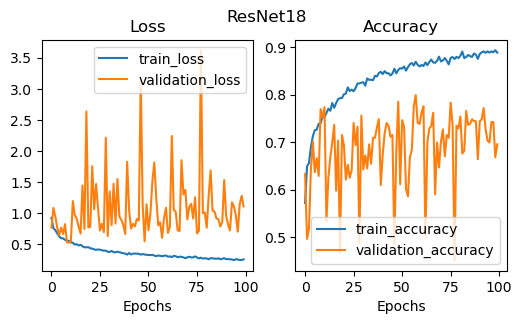

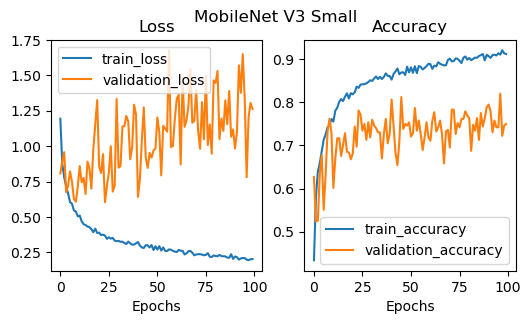

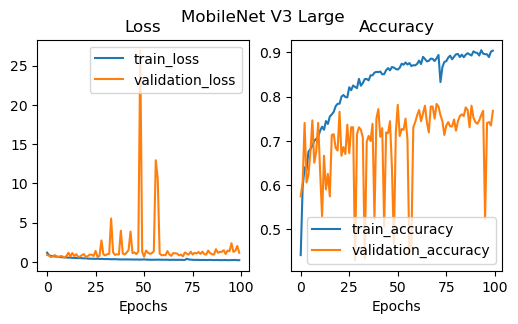

In [17]:
plot_loss_curves(res18_results[0],"ResNet18"),plot_loss_curves(mobnet_sml_results[0],"MobileNet V3 Small"),
plot_loss_curves(mobnet_lrg_results[0],"MobileNet V3 Large"), #plot_loss_curves(effnetb0_results[0],"EfficientNet B0")#, plot_loss_curves(train_effnetb5_results,"EfficientNet B5"),

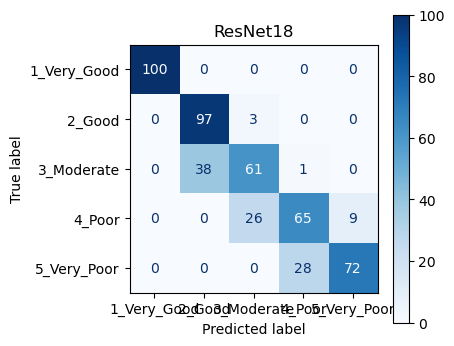

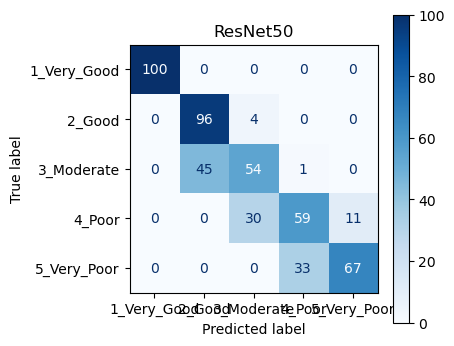

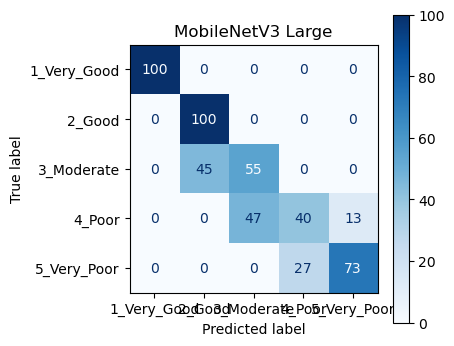

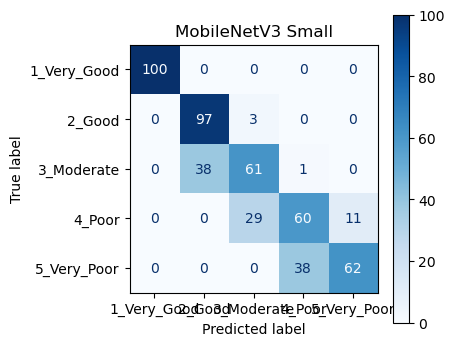

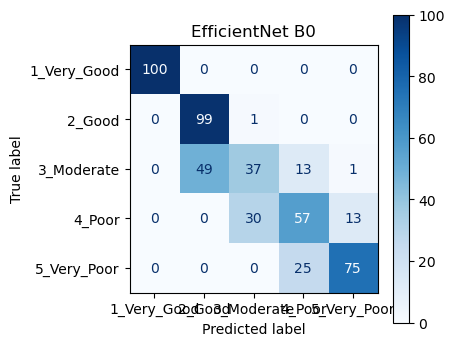

In [ ]:
plot_confusion_matrix(final_res18_model,test_dl,device,class_names, "ResNet18"), #plot_confusion_matrix(final_res50_model, test_dl, device, class_names, "ResNet50"),
plot_confusion_matrix(final_mobnet_lrg_model, test_dl, device, class_names, "MobileNetV3 Large"), plot_confusion_matrix(final_mobnet_sml_model, test_dl, device, class_names, "MobileNetV3 Small"),
#plot_confusion_matrix(final_effnetb0_model,test_dl,device,class_names, "EfficientNet B0")#, plot_confusion_matrix(effnetb5, test_dl, device, class_names, "EfficientNet B5")

In [21]:
results_table = pd.DataFrame([
    res18_results[2],
    #res50_results[2],
    mobnet_sml_results[2],
    mobnet_lrg_results[2],
    #effnetb0_results[2]
])

results_table

,model_name,model_loss,model_acc,model_inf_time,std_inf_time
0,ResNet,1.012893,74.609375,48.813599,8.051722
1,MobileNetV3,1.417630,74.023438,30.385248,9.189917
2,MobileNetV3,1.260908,75.976562,70.310816,14.900944


In [ ]:
final_results_table = pd.DataFrame([
    final_resnet18_eval_results,
    final_resnet50_eval_results,
    final_mobnet_sml_eval_results,
    final_mobnet_lrg_eval_results,
    final_effnetb0_eval_results
])

final_results_table

,model_name,model_loss,model_acc,model_inf_time,std_inf_time
0,ResNet,0.806527,78.515625,50.178591,16.388231
1,ResNet,0.924027,75.781250,193.233504,23.708150
2,MobileNetV3,1.288821,75.390625,45.111967,38.564644
3,MobileNetV3,1.203084,72.851562,57.280160,6.902893
4,EfficientNet,1.068041,77.148438,130.588832,35.668292


In [ ]:
best_results_table = pd.DataFrame([
    best_resnet18_eval_results,
    best_resnet50_eval_results,
    best_mobnet_sml_eval_results,
    best_mobnet_lrg_eval_results,
    best_effnetb0_eval_results
])

best_results_table

,model_name,model_loss,model_acc,model_inf_time,std_inf_time
0,ResNet,0.634344,79.101562,51.444093,20.696904
1,ResNet,0.448066,81.054688,215.152160,33.276489
2,MobileNetV3,0.606304,80.859375,29.873888,13.239567
3,MobileNetV3,0.709580,75.976562,62.787359,28.104239
4,EfficientNet,0.518238,80.273438,127.358079,17.353080
